In [5]:
from msclap import CLAP
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [18]:
df = pd.read_pickle('/work/data_pipeline/audio_data/preprocessing/web_free_source_raw/OpenSLR/SLR101/meta_metrics.pkl').dropna()
kids = df[df['age'].astype(int) <= 11]
kids['class'] = 'child'
display(kids)

df = pd.read_pickle('/work/data_pipeline/audio_data/preprocessing/web_free_source_raw/OpenSLR/SLR101/meta_metrics.pkl').dropna()
adults = df[df['age'].astype(int) > 11]
adults['class'] = 'adult'
display(adults)

,filepath,sample_rate,audio_length,channels,file_size_mb,length,filepath_enhanced,snr_16k,analysis_window_length,verdict_by_window,...,gender,age,accuracy,completeness,fluency,prosodic,words,total,text,class
0,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.10,1,0.094646,49600.0,/work/data_pipeline/audio_data/preprocessing/w...,19.347797,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,7,7.0,10.0,8.0,7.0,"[{'accuracy': 8, 'stress': 10, 'phones': ['Z',...",7.0,ZERO THREE ONE THREE,child
3,/work/data_pipeline/audio_data/preprocessing/w...,16000,2.96,1,0.090374,47360.0,/work/data_pipeline/audio_data/preprocessing/w...,37.513278,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Clean]",...,m,9,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['DH...",8.0,THE YEAR WAS NOW OVER,child
4,/work/data_pipeline/audio_data/preprocessing/w...,16000,4.83,1,0.147442,77280.0,/work/data_pipeline/audio_data/preprocessing/w...,28.772051,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,10,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['HH...",7.0,HE HAS A ROUND FACE AND TWO SMALL EYES,child
8,/work/data_pipeline/audio_data/preprocessing/w...,16000,2.75,1,0.083965,44000.0,/work/data_pipeline/audio_data/preprocessing/w...,35.850266,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean]",...,m,6,9.0,10.0,9.0,9.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['T'...",9.0,TWO EIGHT NINE ONE,child
14,/work/data_pipeline/audio_data/preprocessing/w...,16000,4.41,1,0.134624,70560.0,/work/data_pipeline/audio_data/preprocessing/w...,22.956652,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,9,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['AY...",8.0,I TAKE PEOPLE YOU KNOW AS I FIND THEM,child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,/work/data_pipeline/audio_data/preprocessing/w...,16000,6.62,1,0.202068,105920.0,/work/data_pipeline/audio_data/preprocessing/w...,26.282317,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,7,7.0,10.0,6.0,7.0,"[{'accuracy': 8, 'stress': 10, 'phones': ['L',...",6.0,LUCY WILL A READ IN JUNE SIXTH SEE,child
5237,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.21,1,0.098003,51360.0,/work/data_pipeline/audio_data/preprocessing/w...,33.087924,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,9,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['B'...",8.0,BUT WHAT DOES SHE WANT HERE,child
5239,/work/data_pipeline/audio_data/preprocessing/w...,16000,1.59,1,0.048565,25440.0,/work/data_pipeline/audio_data/preprocessing/w...,41.174023,0.2,[Clean],...,m,6,9.0,10.0,9.0,7.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['G'...",8.0,GOOD JOB,child
5242,/work/data_pipeline/audio_data/preprocessing/w...,16000,4.46,1,0.136150,71360.0,/work/data_pipeline/audio_data/preprocessing/w...,40.316024,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,9,8.0,10.0,7.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['IH...",8.0,IT WAS OF HER I WANTED TO HEAR OF HER,child


,filepath,sample_rate,audio_length,channels,file_size_mb,length,filepath_enhanced,snr_16k,analysis_window_length,verdict_by_window,...,gender,age,accuracy,completeness,fluency,prosodic,words,total,text,class
1,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.764,1,0.114910,60224.0,/work/data_pipeline/audio_data/preprocessing/w...,26.595115,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,30,3.0,10.0,4.0,3.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['B'...",3.0,BUT THE EYES WERE THE THING.,adult
2,/work/data_pipeline/audio_data/preprocessing/w...,16000,5.540,1,0.169109,88640.0,/work/data_pipeline/audio_data/preprocessing/w...,41.385789,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,21,5.0,10.0,6.0,6.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['AH...",5.0,A SURGEON WAS AT WORK AMONG THE SUFFERERS,adult
5,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.020,1,0.092205,48320.0,/work/data_pipeline/audio_data/preprocessing/w...,34.151505,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,15,9.0,10.0,9.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['HH...",8.0,HE MAY BE ABLE TO TELL YOU SOMETHING,adult
6,/work/data_pipeline/audio_data/preprocessing/w...,16000,4.518,1,0.137920,72288.0,/work/data_pipeline/audio_data/preprocessing/w...,25.161080,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,12,7.0,10.0,6.0,7.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['DH...",6.0,THE CHILDREN PRESENTLY RETURNED,adult
7,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.463,1,0.105724,55408.0,/work/data_pipeline/audio_data/preprocessing/w...,32.366536,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,20,8.0,10.0,10.0,9.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['AY...",8.0,I HOPE YOU FIND OUT WHAT THE WORD IS,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.000,1,0.091595,48000.0,/work/data_pipeline/audio_data/preprocessing/w...,18.146806,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,20,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['TH...",8.0,THANK YOU FOR THE ASSIST,adult
5234,/work/data_pipeline/audio_data/preprocessing/w...,16000,2.920,1,0.089153,46720.0,/work/data_pipeline/audio_data/preprocessing/w...,19.943159,0.2,"[Saturated, Clean, Clean, Clean, Clean]",...,m,37,8.0,10.0,9.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['F'...",8.0,FEELS GOOD TO BE HERE AGAIN,adult
5238,/work/data_pipeline/audio_data/preprocessing/w...,16000,4.865,1,0.148510,77840.0,/work/data_pipeline/audio_data/preprocessing/w...,25.414089,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,12,9.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['W'...",8.0,WE CANNOT TAKE FROM THEM WHAT THEY HAVE NOT GOT,adult
5241,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.020,1,0.092205,48320.0,/work/data_pipeline/audio_data/preprocessing/w...,41.599651,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,21,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['B'...",8.0,BUT YOU HAVE TO LISTEN DARLING,adult


In [19]:
#Create single df 
df = pd.concat([adults[['filepath', 'class']], kids[['filepath', 'class']]])
display(df)

,filepath,class
1,/work/data_pipeline/audio_data/preprocessing/w...,adult
2,/work/data_pipeline/audio_data/preprocessing/w...,adult
5,/work/data_pipeline/audio_data/preprocessing/w...,adult
6,/work/data_pipeline/audio_data/preprocessing/w...,adult
7,/work/data_pipeline/audio_data/preprocessing/w...,adult
...,...,...
5236,/work/data_pipeline/audio_data/preprocessing/w...,child
5237,/work/data_pipeline/audio_data/preprocessing/w...,child
5239,/work/data_pipeline/audio_data/preprocessing/w...,child
5242,/work/data_pipeline/audio_data/preprocessing/w...,child


In [20]:
classes = df['class'].unique()

class_id_map = {name: i for i, name in enumerate(classes, 0)}
print(class_id_map)

prompt = 'The speaker is a'
y = [prompt + x for x in classes]


{'adult': 0, 'child': 1}


In [21]:
# Load and initialize CLAP
clap_model = CLAP(version = '2023', use_cuda=True)

# Computing text embeddings
text_embeddings = clap_model.get_text_embeddings(y)

In [22]:
# Computing audio embeddings
y_preds, y_labels = [], []
print(os.getcwd())

for i in tqdm(range(len(df))):
    path, label = df.iloc[i]
    idx = class_id_map[label]
    #print(idx)
    one_hot_target = torch.nn.functional.one_hot(torch.tensor([idx]), num_classes=len(classes)+1)

    audio_embeddings = clap_model.get_audio_embeddings([path], resample=True)
    similarity = clap_model.compute_similarity(audio_embeddings, text_embeddings)

    y_pred = F.softmax(similarity.detach().cpu(), dim=1).numpy()

    y_preds.append(y_pred)
    y_labels.append(one_hot_target.detach().cpu().numpy())


/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [08:57<00:00,  9.30it/s]


In [1]:
y_lab, y_pred = np.concatenate(y_labels, axis=0), np.concatenate(y_preds, axis=0)
y_label_val = np.argmax(y_lab, axis=1)
y_pred_val = np.argmax(y_pred, axis=1)
acc = accuracy_score(np.argmax(y_lab, axis=1), np.argmax(y_pred, axis=1))
print('Accuracy {}'.format(acc))

NameError: name 'np' is not defined

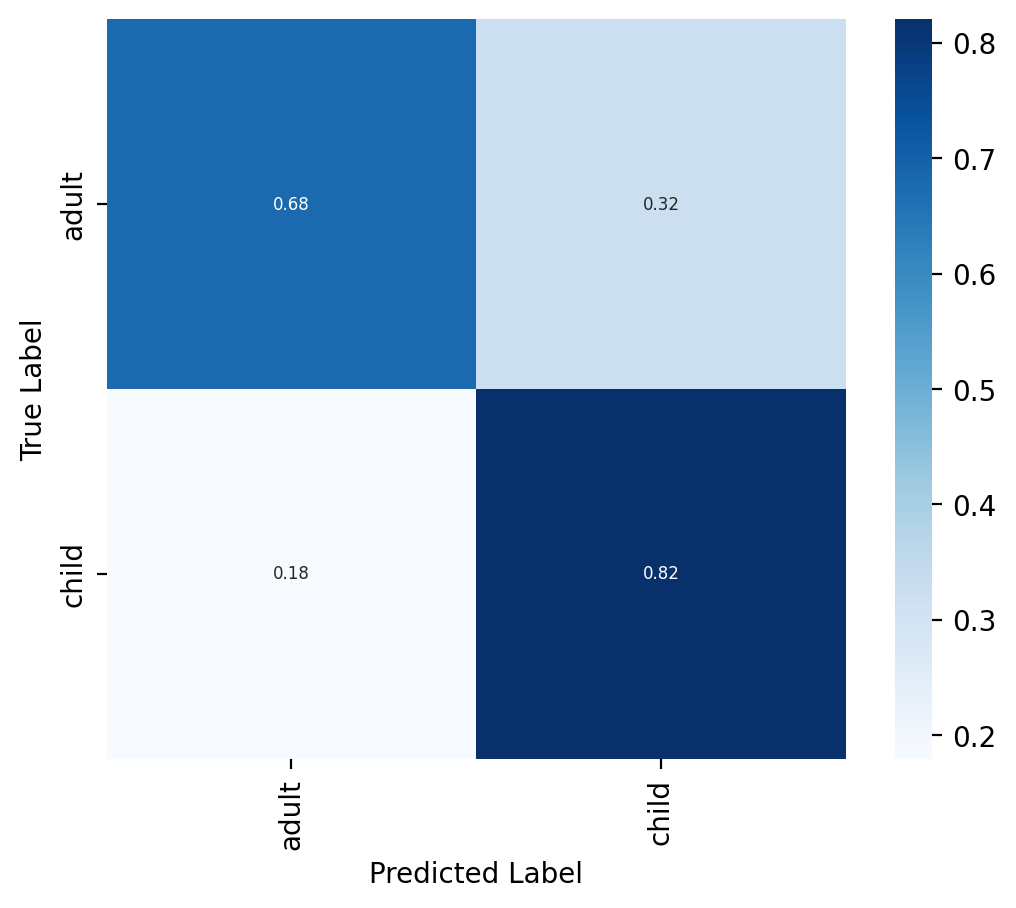

In [24]:
# get confusion matrix
conf_matrix = confusion_matrix(y_label_val,y_pred_val)
conf_mat_norm_recall = conf_matrix.astype('float32')/conf_matrix.sum(axis=1)[:,np.newaxis]
recall_by_class = np.diagonal(conf_mat_norm_recall)
mean_recall = np.mean(recall_by_class)

# Calculate row sums to use for percentages
row_sums = conf_matrix.sum(axis=1)

# Calculate percentages
percentages = (conf_matrix.T / row_sums).T  # Transpose for division, then transpose back

# Format percentages as strings with '%' symbol
annot_data = [['{:.2f}'.format(val) for val in row] for row in percentages]
annot_data = [['' if float(val <= 0.04) else '{:.2f}'.format(val) for val in row] for row in percentages]

plt.figure(dpi=200)

annot_kws = {'size': 6}
ax = sns.heatmap(percentages, xticklabels=classes, yticklabels=classes, annot=annot_data, fmt='', square=True, cmap='Blues', annot_kws=annot_kws)
ax.set_xlabel('Predicted Label')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('True Label')

#plt.subplots_adjust(left=0.2, bottom=0.35)
plt.show()

In [71]:
# Ages 8 - 16 for what a 'child' is
slr_df = pd.read_pickle('/work/data_pipeline/audio_data/preprocessing/web_free_source_raw/OpenSLR/SLR101/meta_metrics.pkl').dropna()

results_dict = {}

for age in range(7, 17):
	print(f'Age: {age}')
 
	kids = slr_df[slr_df['age'].astype(int) <= age]
	kids['class'] = 'child'

	adults = slr_df[slr_df['age'].astype(int) > age]
	adults['class'] = 'adult'
 
	df = pd.concat([adults[['filepath', 'class']], kids[['filepath', 'class']]])
 
	classes = df['class'].unique()

	class_id_map = {name: i for i, name in enumerate(classes, 0)}
	print(class_id_map)

	prompt = 'The speaker is the age of a'
	y = [prompt + x for x in classes]

	# Load and initialize CLAP
	clap_model = CLAP(version = '2023', use_cuda=True)
 
	# Computing audio embeddings
	y_preds, y_labels = [], []
	print(os.getcwd())

	for i in tqdm(range(len(df))):
		path, label = df.iloc[i]
		idx = class_id_map[label]
		#print(idx)
		one_hot_target = torch.nn.functional.one_hot(torch.tensor([idx]), num_classes=len(classes)+1)

		audio_embeddings = clap_model.get_audio_embeddings([path], resample=True)
		similarity = clap_model.compute_similarity(audio_embeddings, text_embeddings)

		y_pred = F.softmax(similarity.detach().cpu(), dim=1).numpy()

		y_preds.append(y_pred)
		y_labels.append(one_hot_target.detach().cpu().numpy())
  
	y_lab, y_pred = np.concatenate(y_labels, axis=0), np.concatenate(y_preds, axis=0)
	y_label_val = np.argmax(y_lab, axis=1)
	y_pred_val = np.argmax(y_pred, axis=1)
	acc = accuracy_score(np.argmax(y_lab, axis=1), np.argmax(y_pred, axis=1))
	
	print('Accuracy {}'.format(acc))

	conf_matrix = confusion_matrix(y_label_val,y_pred_val)
	conf_mat_norm_recall = conf_matrix.astype('float32')/conf_matrix.sum(axis=1)[:,np.newaxis]
	print(conf_mat_norm_recall)
 
	results_dict[age] = conf_matrix

  	
    

Age: 7
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [05:55<00:00, 14.05it/s]


Accuracy 0.6399279855971194
[[0.58128079 0.41871921]
 [0.10649627 0.89350373]]
Age: 8
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [10:55<00:00,  7.63it/s]


Accuracy 0.6617323464692939
[[0.59948718 0.40051282]
 [0.11737944 0.88262056]]
Age: 9
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [10:20<00:00,  8.06it/s]


Accuracy 0.7255451090218044
[[0.65539773 0.34460227]
 [0.10750507 0.89249493]]
Age: 10
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [10:06<00:00,  8.24it/s]  


Accuracy 0.7221444288857771
[[0.65705882 0.34294118]
 [0.13946216 0.86053784]]
Age: 11
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [08:12<00:00, 10.14it/s]


Accuracy 0.7303460692138428
[[0.67738854 0.32261146]
 [0.18020441 0.81979559]]
Age: 12
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [05:58<00:00, 13.94it/s]


Accuracy 0.7193438687737548
[[0.68116438 0.31883562]
 [0.22703223 0.77296777]]
Age: 13
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [06:02<00:00, 13.77it/s]


Accuracy 0.7149429885977195
[[0.68146853 0.31853147]
 [0.24029921 0.75970079]]
Age: 14
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [05:57<00:00, 13.99it/s]


Accuracy 0.7105421084216843
[[0.67978723 0.32021277]
 [0.24965581 0.75034419]]
Age: 15
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [06:00<00:00, 13.88it/s]


Accuracy 0.6989397879575915
[[0.68671875 0.31328125]
 [0.28823288 0.71176712]]
Age: 16
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [06:02<00:00, 13.78it/s]

Accuracy 0.6985397079415884
[[0.6859375  0.3140625 ]
 [0.28823288 0.71176712]]


In [72]:
conf_matrix_dict = {}

for age, conf in results_dict.items():
    print(age)
    tn = conf[0, 0]
    fn = conf[0, 1]
    tp = conf[1, 1]
    fp = conf[1, 0]
    
    acc=(tp+tn)/(tn+fn+tp+fp)
    
    conf_p = conf.astype('float32')/conf.sum(axis=1)[:,np.newaxis]
    tn_p = conf_p[0, 0]
    fn_p = conf_p[0, 1]
    tp_p = conf_p[1, 1]
    fp_p = conf_p[1, 0]
    
    conf_matrix_dict[age] = {'tn':tn, 'fn':fn, 'tp':tp, 'fp':fp, 'acc':acc, 'tn_p':tn_p, 'fn_p':fn_p, 'tp_p':tp_p, 'fp_p':fp_p }
    


7
8
9
10
11
12
13
14
15
16


In [76]:
display(pd.DataFrame.from_dict(conf_matrix_dict).T)

,tn,fn,tp,fp,acc,tn_p,fn_p,tp_p,fp_p
7,2360.0,1700.0,839.0,100.0,0.639928,0.581281,0.418719,0.893504,0.106496
8,2338.0,1562.0,970.0,129.0,0.661732,0.599487,0.400513,0.882621,0.117379
9,2307.0,1213.0,1320.0,159.0,0.725545,0.655398,0.344602,0.892495,0.107505
10,2234.0,1166.0,1376.0,223.0,0.722144,0.657059,0.342941,0.860538,0.139462
11,2127.0,1013.0,1524.0,335.0,0.730346,0.677389,0.322611,0.819796,0.180204
12,1989.0,931.0,1607.0,472.0,0.719344,0.681164,0.318836,0.772968,0.227032
13,1949.0,911.0,1625.0,514.0,0.714943,0.681469,0.318531,0.759701,0.240299
14,1917.0,903.0,1635.0,544.0,0.710542,0.679787,0.320213,0.750344,0.249656
15,1758.0,802.0,1736.0,703.0,0.698940,0.686719,0.313281,0.711767,0.288233
16,1756.0,804.0,1736.0,703.0,0.698540,0.685937,0.314063,0.711767,0.288233


In [4]:
data = {
    'tn': [2360.0, 2338.0, 2307.0, 2234.0, 2127.0, 1989.0, 1949.0, 1917.0, 1758.0, 1756.0],
    'fn': [1700.0, 1562.0, 1213.0, 1166.0, 1013.0, 931.0, 911.0, 903.0, 802.0, 804.0],
    'tp': [839.0, 970.0, 1320.0, 1376.0, 1524.0, 1607.0, 1625.0, 1635.0, 1736.0, 1736.0],
    'fp': [100.0, 129.0, 159.0, 223.0, 335.0, 472.0, 514.0, 544.0, 703.0, 703.0],
    'acc': [0.639928, 0.661732, 0.725545, 0.722144, 0.730346, 0.719344, 0.714943, 0.710542, 0.698940, 0.698540],
    'tn_p': [0.581281, 0.599487, 0.655398, 0.657059, 0.677389, 0.681164, 0.681469, 0.679787, 0.686719, 0.685937],
    'fn_p': [0.418719, 0.400513, 0.344602, 0.342941, 0.322611, 0.318836, 0.318531, 0.320213, 0.313281, 0.314063],
    'tp_p': [0.893504, 0.882621, 0.892495, 0.860538, 0.819796, 0.772968, 0.759701, 0.750344, 0.711767, 0.711767],
    'fp_p': [0.106496, 0.117379, 0.107505, 0.139462, 0.180204, 0.227032, 0.240299, 0.249656, 0.288233, 0.288233]
}

# Include index numbers
index_numbers = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

df = pd.DataFrame(data, index=index_numbers)
display(df)


,tn,fn,tp,fp,acc,tn_p,fn_p,tp_p,fp_p
7,2360.0,1700.0,839.0,100.0,0.639928,0.581281,0.418719,0.893504,0.106496
8,2338.0,1562.0,970.0,129.0,0.661732,0.599487,0.400513,0.882621,0.117379
9,2307.0,1213.0,1320.0,159.0,0.725545,0.655398,0.344602,0.892495,0.107505
10,2234.0,1166.0,1376.0,223.0,0.722144,0.657059,0.342941,0.860538,0.139462
11,2127.0,1013.0,1524.0,335.0,0.730346,0.677389,0.322611,0.819796,0.180204
12,1989.0,931.0,1607.0,472.0,0.719344,0.681164,0.318836,0.772968,0.227032
13,1949.0,911.0,1625.0,514.0,0.714943,0.681469,0.318531,0.759701,0.240299
14,1917.0,903.0,1635.0,544.0,0.710542,0.679787,0.320213,0.750344,0.249656
15,1758.0,802.0,1736.0,703.0,0.698940,0.686719,0.313281,0.711767,0.288233
16,1756.0,804.0,1736.0,703.0,0.698540,0.685937,0.314063,0.711767,0.288233


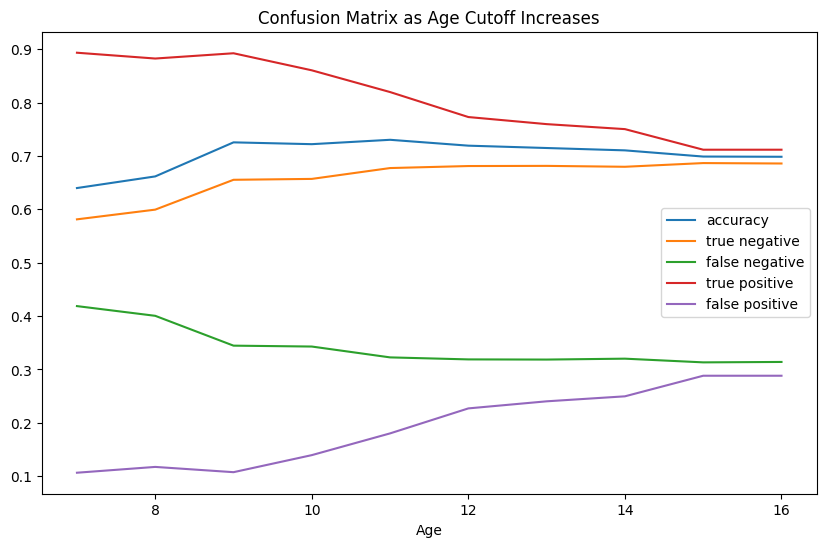

In [8]:
# Plotting the last 5 columns
fig, ax = plt.subplots(figsize=(10, 6))

# Select the last 5 columns
plot_columns = df.columns[-5:]

cols = ['accuracy', 'true negative', 'false negative', 'true positive', 'false positive']
# Plotting each column
for i, col in enumerate(plot_columns):
    ax.plot(df.index, df[col], label=cols[i])

# Set x-axis label and title
ax.set_xlabel('Age')
ax.set_title('Confusion Matrix as Age Cutoff Increases')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
# As the class gets less restrictive, ability to accurately identify children's speech gets worse.